<a href="https://colab.research.google.com/github/MohamedElhadidy99/Bank-marketing-with-Python/blob/main/Bank_marketing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#read the csv file of dataset
from google.colab import files
uploaded = files.upload()
import io
data = pd.read_csv(io.BytesIO(uploaded['bank-full.csv']),delimiter=";")

Saving bank-full.csv to bank-full (1).csv


In [ ]:
#Explore dataset,columns and their types
data.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
print(data.columns)
print(data.shape)
print(data.dtypes)

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')
(41188, 21)
age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object


In [ ]:
#check pdays column, pdays column represents number of days that passed by after the client was last contacted from a previous campaign
data.pdays.value_counts(normalize=True)

999    0.963217
3      0.010658
6      0.010003
4      0.002865
9      0.001554
2      0.001481
7      0.001457
12     0.001408
10     0.001263
5      0.001117
13     0.000874
11     0.000680
1      0.000631
15     0.000583
14     0.000486
8      0.000437
0      0.000364
16     0.000267
17     0.000194
18     0.000170
22     0.000073
19     0.000073
21     0.000049
25     0.000024
26     0.000024
27     0.000024
20     0.000024
Name: pdays, dtype: float64

In [ ]:
#since 96% of the 'pdays' column is missing values, we'll drop the column
data=data.drop(['pdays'],axis=1)

In [ ]:
data.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,198,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,139,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,217,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,380,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,50,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
#Clean dataset
#check for null values, p.s Null values are named 'unknown'
data=data.replace('unknown',np.nan)
print(data.isna().sum())

age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64


In [ ]:
#Drop rows with null values
data= data.dropna(axis=0)

In [ ]:
print(data.isna().sum())

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


In [ ]:
print(data.shape)
print(data.dtypes)

(30488, 20)
age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object


In [ ]:
#Rename 'y' variable to be 'subscription'
data.rename(columns = {'y':'subscription'}, inplace = True)
print(data.columns)

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'subscription'],
      dtype='object')


In [ ]:
#Convert 'duration' column from seconds into minutes
data['duration'] = data['duration']/ 60


In [ ]:
data['duration']=data['duration'].round(decimals = 1)


In [ ]:
data.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscription
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,4.4,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,3.8,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,2.5,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,5.1,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,2.3,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,6.3,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,0.8,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
11,25,services,single,high.school,no,yes,no,telephone,may,mon,3.7,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
12,29,blue-collar,single,high.school,no,no,yes,telephone,may,mon,2.3,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
13,57,housemaid,divorced,basic.4y,no,yes,no,telephone,may,mon,4.9,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
#more info about categorical variables of the data
print(data.dtypes)
print(data['job'].unique())
print(data['marital'].unique())
print(data['education'].unique())

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration          float64
campaign            int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
subscription       object
dtype: object
['housemaid' 'services' 'admin.' 'technician' 'blue-collar' 'unemployed'
 'retired' 'entrepreneur' 'management' 'student' 'self-employed']
['married' 'single' 'divorced']
['basic.4y' 'high.school' 'basic.6y' 'professional.course' 'basic.9y'
 'university.degree' 'illiterate']


In [ ]:
#Divide data into sections
#First section is "Banl client data", it includes first 7 columns
client_data=data.iloc[:, 0:7]

In [ ]:
client_data.head(10)

,age,job,marital,education,default,housing,loan
0,56,housemaid,married,basic.4y,no,no,no
2,37,services,married,high.school,no,yes,no
3,40,admin.,married,basic.6y,no,no,no
4,56,services,married,high.school,no,no,yes
6,59,admin.,married,professional.course,no,no,no
8,24,technician,single,professional.course,no,yes,no
9,25,services,single,high.school,no,yes,no
11,25,services,single,high.school,no,yes,no
12,29,blue-collar,single,high.school,no,no,yes
13,57,housemaid,divorced,basic.4y,no,yes,no


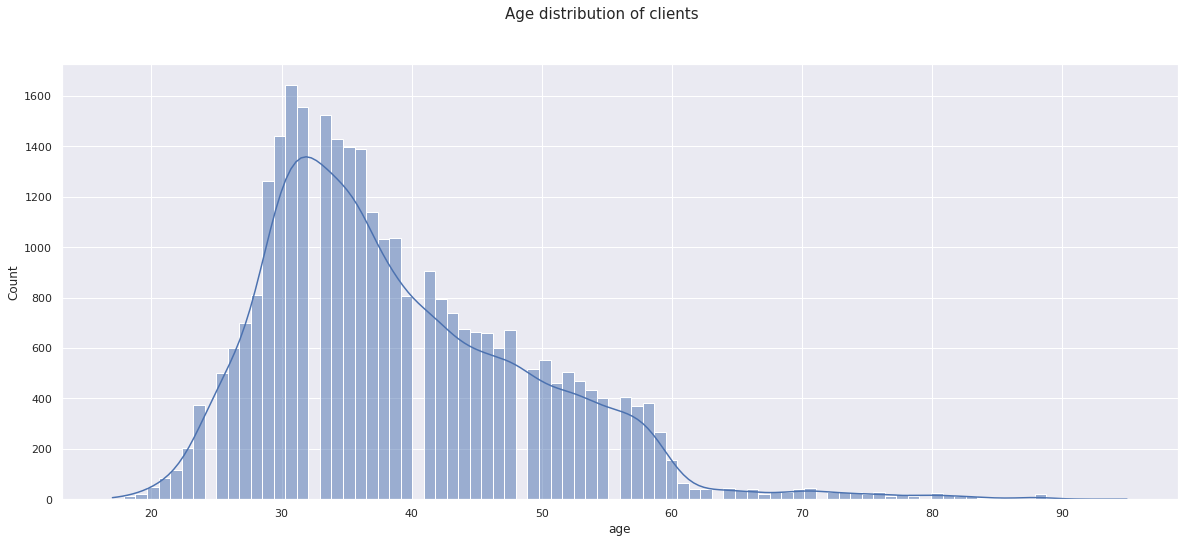

In [ ]:
#Exploratory data analysis
#Age distribution of contacted clients
sns.set(style="darkgrid")
fig, ax = plt.subplots(figsize=(20,8))
sns.histplot(data=client_data, x="age",kde=True)
plt.suptitle("Age distribution of clients",fontsize= 15)
plt.show()



There is high variety in age distribution among contacted clients meaning that clients of different ages are contacted, but number of contacted clients in the 30 - 40 age group is relatevely the highest

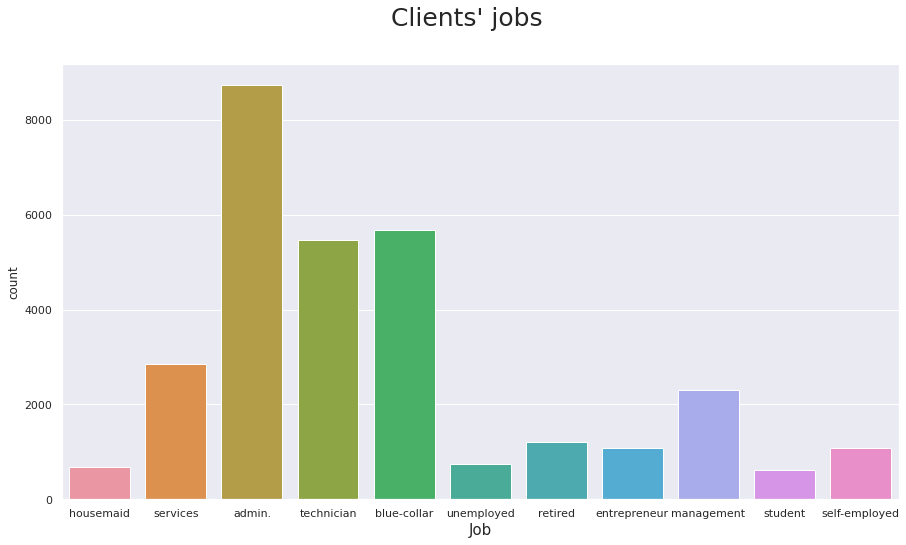

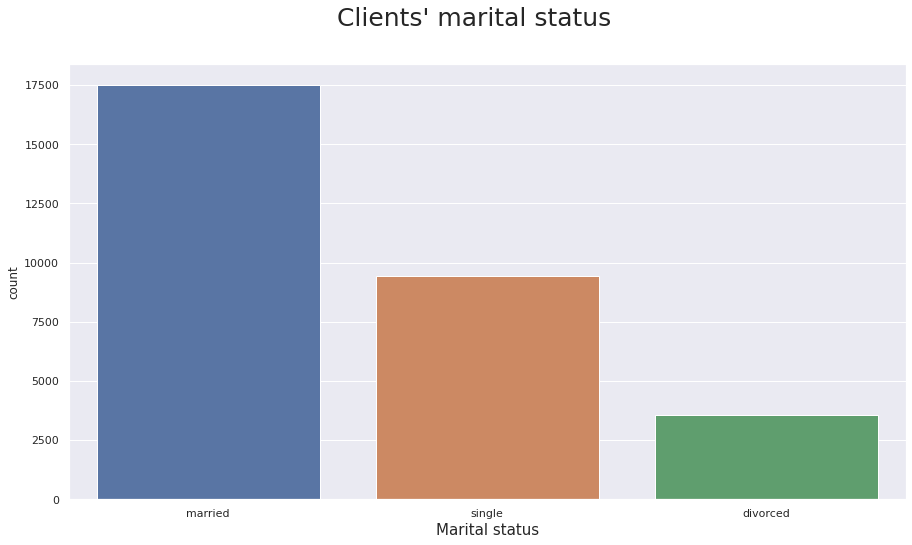

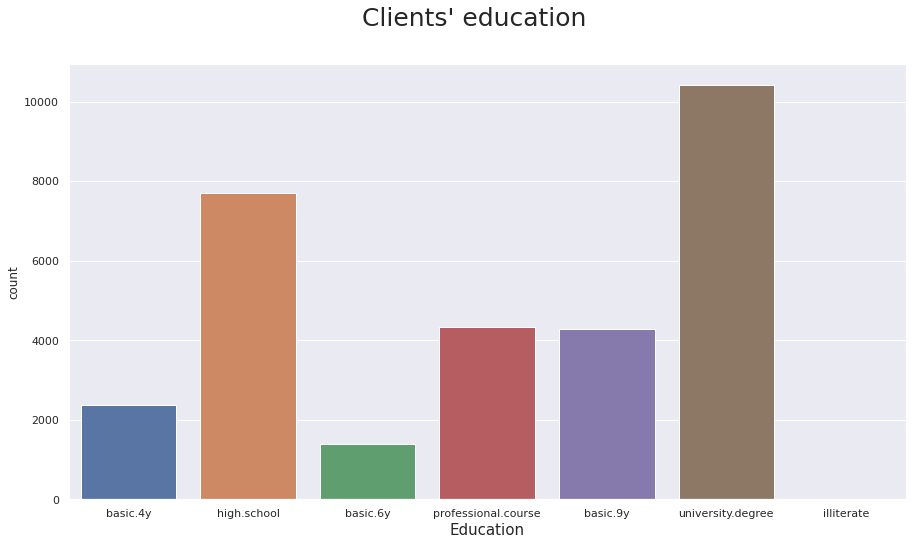

In [ ]:
#Marital status, job and education of contacted clients

sns.set(style="darkgrid")
fig, ax = plt.subplots(figsize=(15,8))
sns.countplot(data=client_data, x="job")
ax.set_xlabel('Job', fontsize=15)
plt.suptitle("Clients' jobs",fontsize= 25)
plt.show()

sns.set(style="darkgrid")
fig, ax = plt.subplots(figsize=(15,8))
sns.countplot(data=client_data, x="marital")
ax.set_xlabel('Marital status', fontsize=15)
plt.suptitle("Clients' marital status",fontsize= 25)
plt.show()

sns.set(style="darkgrid")
fig, ax = plt.subplots(figsize=(15,8))
sns.countplot(data=client_data, x="education")
ax.set_xlabel('Education', fontsize=15)
plt.suptitle("Clients' education",fontsize= 25)
plt.show()

Most common job among contacted clients is adminstration jobs, followed by blue collar jobs and technicians with almost same frequency.
Being married is the most frequent marital status among contacted clients wuth a great difference.
For education, the category with highest frequency is university degree followed by clients with high school degrees.


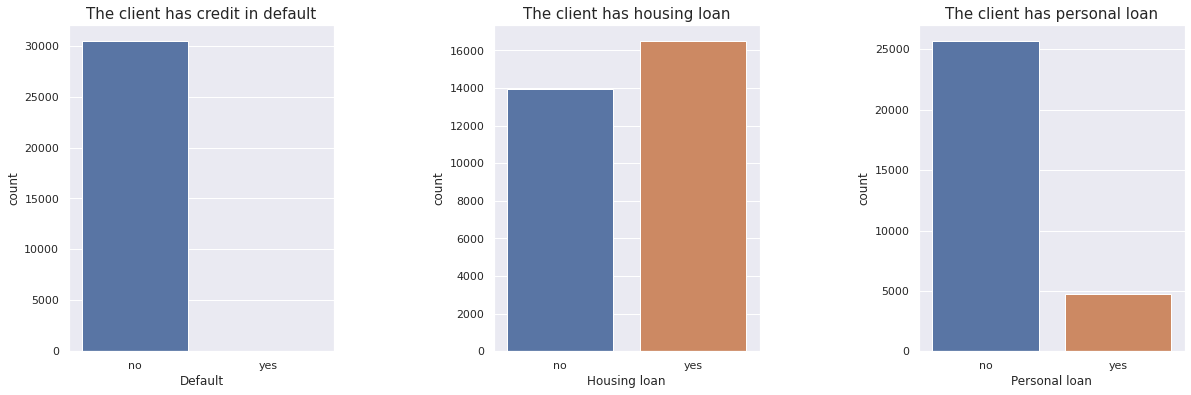

In [ ]:
#Default, housing loans and personal loans of contacted clients
sns.set(style="darkgrid")
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (20,6))

sns.countplot(data=client_data, x="default",ax=ax1)
ax1.set_xlabel('Default', fontsize=12)
ax1.set_title("The client has credit in default",fontsize= 15)

sns.countplot(data=client_data, x="housing",ax=ax2)
ax2.set_xlabel('Housing loan', fontsize=12)
ax2.set_title("The client has housing loan",fontsize= 15)

sns.countplot(data=client_data, x="loan",ax=ax3)
ax3.set_xlabel('Personal loan', fontsize=12)
ax3.set_title("The client has personal loan",fontsize= 15)

plt.subplots_adjust(wspace=0.6)

plt.show()

more than 99% of contacted clients have no credit in default.
most of contacted clients have no personal loans.
Higher percentage of the clients have housing loans.

In [ ]:
data['default'].value_counts()

no     30485
yes        3
Name: default, dtype: int64

In [ ]:
#Crosstabs for different categorical variables
crosstab1=pd.crosstab(client_data.job, client_data.housing)
crosstab2=pd.crosstab(client_data.job, client_data.loan)
crosstab3=pd.crosstab(client_data.education, client_data.housing)
crosstab4=pd.crosstab(client_data.education, client_data.loan)
crosstab5=pd.crosstab(client_data.marital, client_data.housing)
crosstab6=pd.crosstab(client_data.marital, client_data.loan)

print(crosstab1)
print(crosstab2)
print(crosstab3)


housing          no   yes
job                      
admin.         3959  4778
blue-collar    2658  3017
entrepreneur    487   602
housemaid       326   364
management     1090  1221
retired         554   662
self-employed   500   592
services       1355  1502
student         282   328
technician     2437  3036
unemployed      319   419
loan             no   yes
job                      
admin.         7253  1484
blue-collar    4782   893
entrepreneur    930   159
housemaid       593    97
management     1956   355
retired        1050   166
self-employed   938   154
services       2424   433
student         508   102
technician     4662   811
unemployed      624   114
housing                no   yes
education                      
basic.4y             1152  1228
basic.6y              651   738
basic.9y             1946  2330
high.school          3623  4076
illiterate              5     6
professional.course  1912  2409
university.degree    4678  5734


In [ ]:
# Correlation between categorical variables
!pip install researchpy
import researchpy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
crosstab, res = researchpy.crosstab(client_data.job, client_data.housing, test='chi-square')
print("Correlaion between job and housing loans" , res )

crosstab, res = researchpy.crosstab(client_data.job, client_data.loan, test='chi-square')
print("Correlaion between job and personal loans" ,res)

crosstab, res = researchpy.crosstab(client_data.education, client_data.housing, test='chi-square')
print("Correlaion between education and housing loans" , res )

crosstab, res = researchpy.crosstab(client_data.education, client_data.loan, test='chi-square')
print("Correlaion between education and personal loans" , res )

crosstab, res = researchpy.crosstab(client_data.marital, client_data.housing, test='chi-square')
print("Correlaion between marital status and housing loans" , res )

crosstab, res = researchpy.crosstab(client_data.marital, client_data.loan, test='chi-square')
print("Correlaion between marital status and personal loans" , res )

Correlaion between job and housing loans                  Chi-square test  results
0  Pearson Chi-square ( 10.0) =   14.7829
1                     p-value =    0.1402
2                  Cramer's V =    0.0220
Correlaion between job and personal loans                  Chi-square test  results
0  Pearson Chi-square ( 10.0) =   23.8328
1                     p-value =    0.0081
2                  Cramer's V =    0.0280
Correlaion between education and housing loans                 Chi-square test  results
0  Pearson Chi-square ( 6.0) =   19.5584
1                    p-value =    0.0033
2                 Cramer's V =    0.0253
Correlaion between education and personal loans                 Chi-square test  results
0  Pearson Chi-square ( 6.0) =    5.5229
1                    p-value =    0.4787
2                 Cramer's V =    0.0135
Correlaion between marital status and housing loans                 Chi-square test  results
0  Pearson Chi-square ( 2.0) =    2.9587
1                    p-v

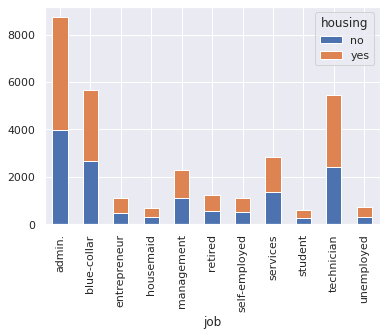

In [ ]:
ct1=crosstab1.plot(kind='bar',stacked=True)

After performing exploratory analysis for categorical variables, transform them into continous variables to work with

In [ ]:
print(client_data['job'].value_counts())
print(client_data['education'].value_counts())
print(client_data['marital'].value_counts())
print(client_data['default'].value_counts())
print(client_data['loan'].value_counts())
print(client_data['housing'].value_counts())


admin.           8737
blue-collar      5675
technician       5473
services         2857
management       2311
retired          1216
self-employed    1092
entrepreneur     1089
unemployed        738
housemaid         690
student           610
Name: job, dtype: int64
university.degree      10412
high.school             7699
professional.course     4321
basic.9y                4276
basic.4y                2380
basic.6y                1389
illiterate                11
Name: education, dtype: int64
married     17492
single       9443
divorced     3553
Name: marital, dtype: int64
no     30485
yes        3
Name: default, dtype: int64
no     25720
yes     4768
Name: loan, dtype: int64
yes    16521
no     13967
Name: housing, dtype: int64


In [ ]:
print(client_data['job'].value_counts())
print(client_data['education'].value_counts())
print(client_data['marital'].value_counts())
print(client_data['default'].value_counts())
print(client_data['loan'].value_counts())
print(client_data['housing'].value_counts())


admin.           8737
blue-collar      5675
technician       5473
services         2857
management       2311
retired          1216
self-employed    1092
entrepreneur     1089
unemployed        738
housemaid         690
student           610
Name: job, dtype: int64
university.degree      10412
high.school             7699
professional.course     4321
basic.9y                4276
basic.4y                2380
basic.6y                1389
illiterate                11
Name: education, dtype: int64
married     17492
single       9443
divorced     3553
Name: marital, dtype: int64
no     30485
yes        3
Name: default, dtype: int64
no     25720
yes     4768
Name: loan, dtype: int64
yes    16521
no     13967
Name: housing, dtype: int64


In [ ]:
#recoding categorical variables
from sklearn import preprocessing
cat_columns = [cname for cname in client_data.columns
                        if client_data[cname].dtype == 'object']

encoder = preprocessing.LabelEncoder()

for col in cat_columns:
    client_data[col] = encoder.fit_transform(client_data[col])

client_data.head(20)

,age,job,marital,education,default,housing,loan
0,56,3,1,0,0,0,0
2,37,7,1,3,0,1,0
3,40,0,1,1,0,0,0
4,56,7,1,3,0,0,1
6,59,0,1,5,0,0,0
8,24,9,2,5,0,1,0
9,25,7,2,3,0,1,0
11,25,7,2,3,0,1,0
12,29,1,2,3,0,0,1
13,57,3,0,0,0,1,0


Client data is processed and ready to work with

Second, Variables related with the last contact of the current campaign:

In [ ]:
contact_data=data.iloc[: , 7:11]
print(contact_data.head(5))

     contact month day_of_week  duration
0  telephone   may         mon       4.4
2  telephone   may         mon       3.8
3  telephone   may         mon       2.5
4  telephone   may         mon       5.1
6  telephone   may         mon       2.3


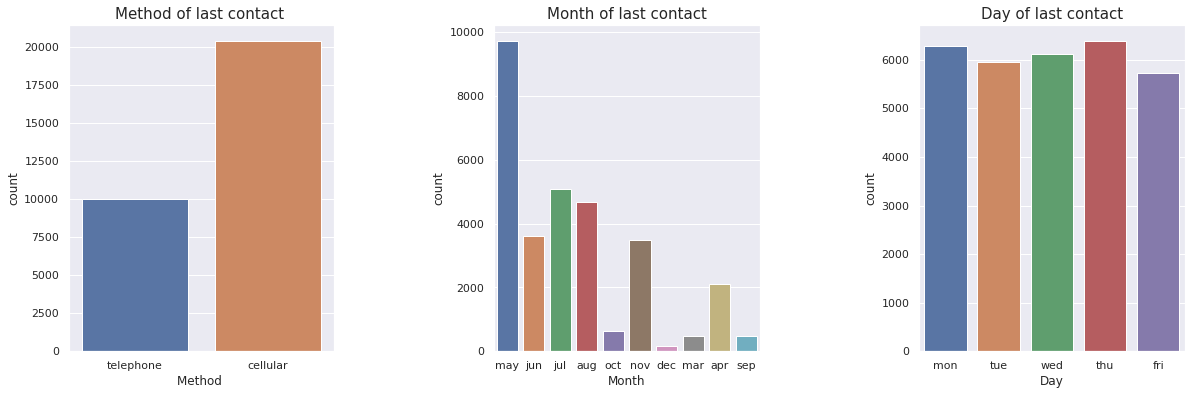

In [ ]:
#Exploratory data analysis on contact variables

#Method, month and day of last contact
sns.set(style="darkgrid")
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (20,6))

sns.countplot(data=contact_data, x="contact",ax=ax1)
ax1.set_xlabel('Method ', fontsize=12)
ax1.set_title("Method of last contact ",fontsize= 15)

sns.countplot(data=contact_data, x="month",ax=ax2)
ax2.set_xlabel('Month', fontsize=12)
ax2.set_title("Month of last contact",fontsize= 15)

sns.countplot(data=contact_data, x="day_of_week",ax=ax3)
ax3.set_xlabel('Day', fontsize=12)
ax3.set_title("Day of last contact",fontsize= 15)

plt.subplots_adjust(wspace=0.6)

plt.show()

Most common method of communication is mobile phone.
May is the month with most contacts followed by July with almost half the times of contacts.
Thursday has slightly the most number of contacts, although all days are almost the same and no big difference between them.

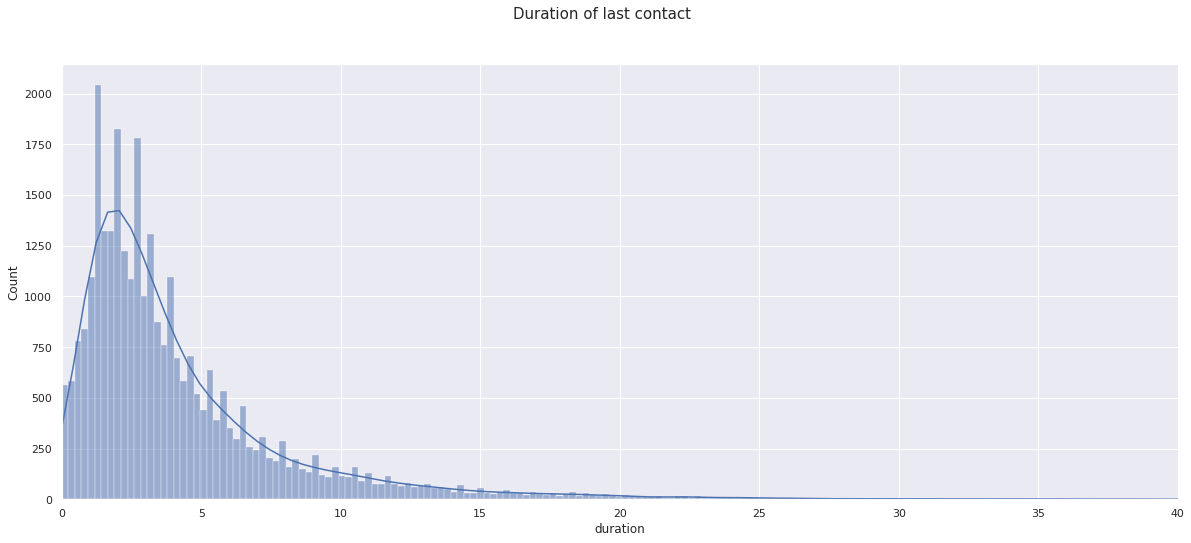

In [ ]:
#Visualize Duration of calls
fig, ax = plt.subplots(figsize=(20,8))
sns.histplot(data=contact_data,x='duration',kde=True)
plt.suptitle("Duration of last contact",fontsize= 15)
plt.xlim(0, 40)
plt.show()

Most of call duration lies in range of 0-10 minutes

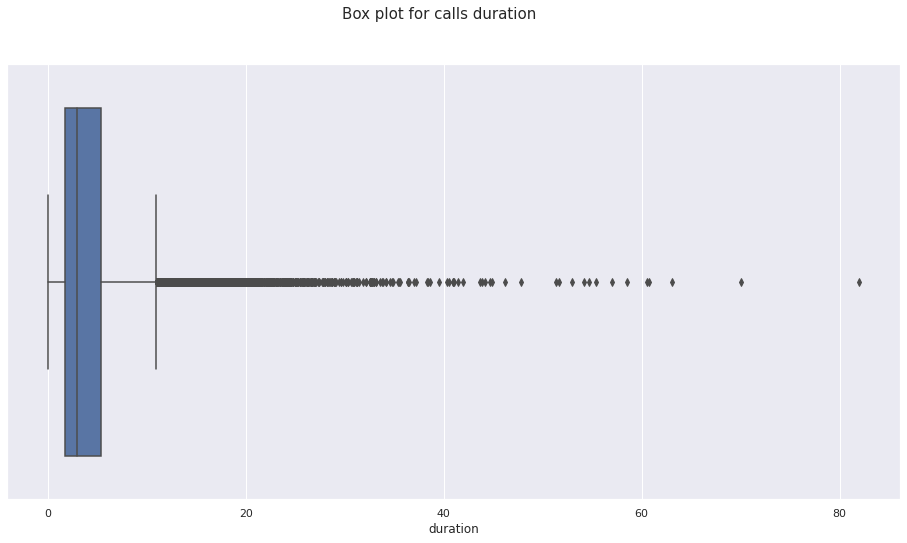

In [ ]:
#Box plot for call durations
sns.set_theme(style="darkgrid")
fig, ax = plt.subplots(figsize=(16,8))
ax = sns.boxplot(x=contact_data["duration"])
plt.suptitle("Box plot for calls duration",fontsize= 15)
plt.show()

In [ ]:
#Duration of calls in minutes
print(contact_data['duration'].min())
print(contact_data['duration'].mean())
print(contact_data['duration'].std())
print(contact_data['duration'].max())


0.0
4.324954080293886
4.36220740492956
82.0


In [ ]:
#Calculate Quartiles and IQR
first_quartile = np.quantile(contact_data['duration'], 0.25)
print("1st quartile:",first_quartile)

second_quartile = np.quantile(contact_data['duration'], 0.5)
print("2nd quartile:",second_quartile)

third_quartile = np.quantile(contact_data['duration'], 0.75)
print("2nd quartile:",third_quartile)

fourth_quartile = np.quantile(contact_data['duration'], 1)
print("2nd quartile:",fourth_quartile)

#IQR = Q3 - Q1
IQR = third_quartile - first_quartile
print("IQR:", IQR)

#Check outliers using IQR, add 1.5*IQR to Q3 and Any number greater than this is a suspected outlier

upper_limit = third_quartile + 1.5*IQR
print("Upper limit",upper_limit.round(1))




1st quartile: 1.7
2nd quartile: 3.0
2nd quartile: 5.4
2nd quartile: 82.0
IQR: 3.7
Upper limit 11.0


If the call duration is above 11 minutes, it's a possible outlier

In [ ]:
#Get number of outliers
print('Numerber of outliers: ', contact_data[contact_data['duration'] > 11]['duration'].count())
print(contact_data.shape)
print("Percentage of outliers:",30488/2052 )

Numerber of outliers:  2052
(30488, 4)
Percentage of outliers: 14.857699805068226


In [ ]:
print(contact_data['month'].value_counts())
print(contact_data['contact'].value_counts())
print(contact_data['day_of_week'].value_counts())


may    9733
jul    5081
aug    4673
jun    3614
nov    3496
apr    2115
oct     642
sep     495
mar     482
dec     157
Name: month, dtype: int64
cellular     20443
telephone    10045
Name: contact, dtype: int64
thu    6395
mon    6279
wed    6125
tue    5955
fri    5734
Name: day_of_week, dtype: int64


In [ ]:
#Encode contact data as numeric
from sklearn import preprocessing
cat_columns = [cname for cname in contact_data.columns
                        if contact_data[cname].dtype == 'object']

encoder = preprocessing.LabelEncoder()

for col in cat_columns:
    contact_data[col] = encoder.fit_transform(contact_data[col])

contact_data.head(20)

,contact,month,day_of_week,duration
0,1,6,1,4.4
2,1,6,1,3.8
3,1,6,1,2.5
4,1,6,1,5.1
6,1,6,1,2.3
8,1,6,1,6.3
9,1,6,1,0.8
11,1,6,1,3.7
12,1,6,1,2.3
13,1,6,1,4.9


Percentage of outliersbased on call duration is 14.85%

In [ ]:
#Dealing with other attributes, including 'campaign' which represents number of contacts performed during this campaign, 'previous' representing number of contacts performed before this campaign and 'poutcome' represnting outcome of the previous marketing campaign
bank_other= data.iloc[:, 11:14]
print(bank_other.head(5))


   campaign  previous     poutcome
0         1         0  nonexistent
2         1         0  nonexistent
3         1         0  nonexistent
4         1         0  nonexistent
6         1         0  nonexistent


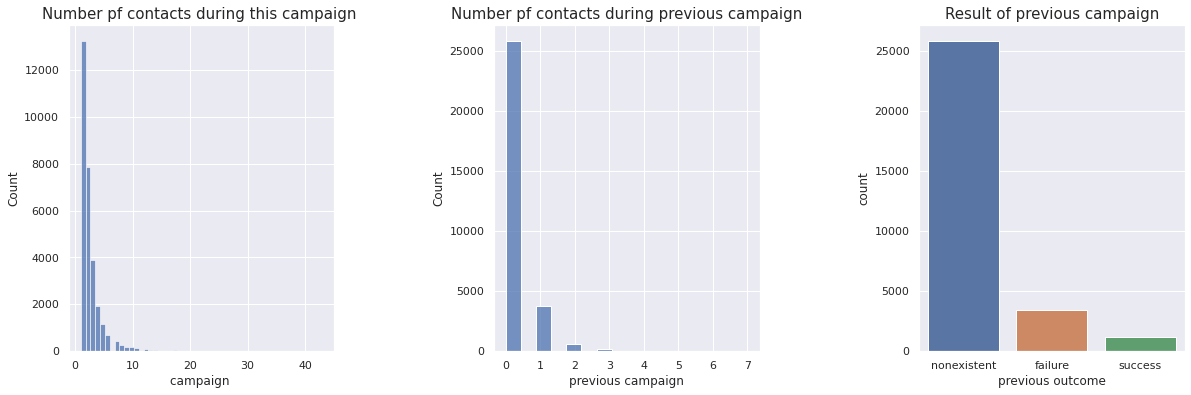

In [ ]:
#Perform EDA on other attributes
sns.set(style="darkgrid")
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (20,6))

sns.histplot(data=bank_other, x="campaign",bins =50 ,ax=ax1)
ax1.set_xlabel('campaign ', fontsize=12)
ax1.set_title("Number pf contacts during this campaign ",fontsize= 15)

sns.histplot(data=bank_other, x="previous",ax=ax2)
ax2.set_xlabel('previous campaign', fontsize=12)
ax2.set_title("Number pf contacts during previous campaign",fontsize= 15)

sns.countplot(data=bank_other, x="poutcome",ax=ax3)
ax3.set_xlabel('previous outcome', fontsize=12)
ax3.set_title("Result of previous campaign",fontsize= 15)

plt.subplots_adjust(wspace=0.6)

plt.show()

Majority of clients are contacted less than 5 times during this campaign.
Majority of contacted clients during this campaign didn't get contacted during previuos one.

In [ ]:
#Recode the poutcome variable as numeric
bank_other['poutcome'].replace(['nonexistent', 'failure', 'success'], [1,2,3], inplace  = True)

In [ ]:
#Explore social and economic context attributes
social_eco=data.iloc[:, 14:19]
print(social_eco.head())


   emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed
0           1.1          93.994          -36.4      4.857       5191.0
2           1.1          93.994          -36.4      4.857       5191.0
3           1.1          93.994          -36.4      4.857       5191.0
4           1.1          93.994          -36.4      4.857       5191.0
6           1.1          93.994          -36.4      4.857       5191.0


In [ ]:
#Concatenate all data together
bank_full= pd.concat([client_data, contact_data, bank_other, social_eco], axis = 1)

In [ ]:
bank_full.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,3,1,0,0,0,0,1,6,1,4.4,1,0,1,1.1,93.994,-36.4,4.857,5191.0
2,37,7,1,3,0,1,0,1,6,1,3.8,1,0,1,1.1,93.994,-36.4,4.857,5191.0
3,40,0,1,1,0,0,0,1,6,1,2.5,1,0,1,1.1,93.994,-36.4,4.857,5191.0
4,56,7,1,3,0,0,1,1,6,1,5.1,1,0,1,1.1,93.994,-36.4,4.857,5191.0
6,59,0,1,5,0,0,0,1,6,1,2.3,1,0,1,1.1,93.994,-36.4,4.857,5191.0
8,24,9,2,5,0,1,0,1,6,1,6.3,1,0,1,1.1,93.994,-36.4,4.857,5191.0
9,25,7,2,3,0,1,0,1,6,1,0.8,1,0,1,1.1,93.994,-36.4,4.857,5191.0
11,25,7,2,3,0,1,0,1,6,1,3.7,1,0,1,1.1,93.994,-36.4,4.857,5191.0
12,29,1,2,3,0,0,1,1,6,1,2.3,1,0,1,1.1,93.994,-36.4,4.857,5191.0
13,57,3,0,0,0,1,0,1,6,1,4.9,1,0,1,1.1,93.994,-36.4,4.857,5191.0


In [ ]:
print(bank_full.shape)
print(bank_full.columns)

(30488, 19)
Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed'],
      dtype='object')


In [ ]:
pip install -U --pre pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Import pycaret library to perform modeling
from pycaret.classification import *


In [ ]:
y=data['subscription']
X=bank_full

In [ ]:
s = setup(data=bank_full ,target=y)


,Description,Value
0,Session id,860
1,Target,subscription
2,Target type,Binary
3,Target mapping,"no: 0, yes: 1"
4,Original data shape,"(30488, 20)"
5,Transformed data shape,"(30488, 20)"
6,Transformed train set shape,"(21341, 20)"
7,Transformed test set shape,"(9147, 20)"
8,Numeric features,19
9,Preprocess,True


In [ ]:
best=compare_models()


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.9055,0.9412,0.5317,0.6576,0.5872,0.5346,0.5389,2.0070
lightgbm,Light Gradient Boosting Machine,0.9040,0.9435,0.5498,0.6415,0.5915,0.5375,0.5399,0.4100
rf,Random Forest Classifier,0.9026,0.9372,0.5146,0.6454,0.5718,0.5177,0.5224,1.6160
ada,Ada Boost Classifier,0.8986,0.9324,0.4024,0.6649,0.5005,0.4479,0.4659,0.6970
lr,Logistic Regression,0.8974,0.9163,0.3932,0.6595,0.4915,0.4386,0.4574,3.9250
et,Extra Trees Classifier,0.8954,0.9247,0.4246,0.6285,0.5059,0.4500,0.4613,1.7450
ridge,Ridge Classifier,0.8943,0.0000,0.2954,0.6981,0.4140,0.3663,0.4080,0.1140
lda,Linear Discriminant Analysis,0.8936,0.9161,0.4928,0.5970,0.5390,0.4795,0.4829,0.1600
knn,K Neighbors Classifier,0.8836,0.8690,0.4258,0.5526,0.4801,0.4159,0.4208,2.2640
dt,Decision Tree Classifier,0.8742,0.7165,0.5054,0.5036,0.5042,0.4322,0.4324,0.1840


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

Gradient Boosting Classifier has the best accuracy followed by Light Gradient Boosting Machine and random forest.

Light Gradient Boosting Machine	 has highest AUC followed by  Gradient Boosting classifier and random forest.

According to F1 score, Light Gradient Boosting Machine has the highest score followed by Gradient Boosting Classifier and Random forest.


In [ ]:
#create models and comparing them
gbc=create_model('gbc')
lightgbm=create_model('lightgbm')
rf=create_model('rf')
ada = create_model('ada')


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8998,0.9363,0.5203,0.6267,0.5685,0.5124,0.5152
1,0.9082,0.9447,0.5741,0.6568,0.6126,0.5608,0.5624
2,0.8997,0.9335,0.4815,0.6373,0.5485,0.4933,0.4995
3,0.9016,0.9386,0.5185,0.6364,0.5714,0.5165,0.5200
4,0.9100,0.9441,0.5481,0.6789,0.6066,0.5564,0.5605
5,0.9021,0.9426,0.4926,0.6488,0.5600,0.5061,0.5121
6,0.9157,0.9448,0.5185,0.7368,0.6087,0.5630,0.5740
7,0.9100,0.9416,0.5963,0.6598,0.6265,0.5755,0.5764
8,0.9044,0.9425,0.5407,0.6460,0.5887,0.5351,0.5378


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8988,0.9407,0.5314,0.6180,0.5714,0.5144,0.5163
1,0.9039,0.9473,0.5778,0.6316,0.6035,0.5490,0.5497
2,0.8936,0.9314,0.4963,0.5956,0.5414,0.4818,0.4844
3,0.9039,0.9457,0.5704,0.6337,0.6004,0.5460,0.5469
4,0.9030,0.9458,0.5148,0.6465,0.5732,0.5193,0.5236
5,0.9091,0.9441,0.5407,0.6759,0.6008,0.5502,0.5546
6,0.9119,0.9469,0.5370,0.6971,0.6067,0.5580,0.5641
7,0.9110,0.9457,0.6185,0.6575,0.6374,0.5867,0.5871
8,0.9067,0.9436,0.5593,0.6537,0.6028,0.5503,0.5525


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9026,0.9348,0.5277,0.6413,0.5789,0.5245,0.5276
1,0.9072,0.9434,0.5704,0.6525,0.6087,0.5563,0.5580
2,0.8941,0.9261,0.4667,0.6058,0.5272,0.4687,0.4738
3,0.9016,0.9333,0.5222,0.6351,0.5732,0.5182,0.5213
4,0.9039,0.9414,0.4963,0.6601,0.5666,0.5138,0.5204
5,0.9077,0.9369,0.5259,0.6730,0.5904,0.5393,0.5445
6,0.9053,0.9411,0.4556,0.6910,0.5491,0.4987,0.5122
7,0.9016,0.9378,0.5519,0.6261,0.5866,0.5310,0.5324
8,0.9016,0.9372,0.5148,0.6376,0.5697,0.5148,0.5186


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8927,0.9277,0.3985,0.6207,0.4854,0.4287,0.4418
1,0.9105,0.9376,0.4704,0.7257,0.5708,0.5234,0.5387
2,0.8936,0.9289,0.3667,0.6387,0.4659,0.4116,0.4312
3,0.8964,0.9300,0.3963,0.6485,0.4920,0.4380,0.4545
4,0.8983,0.9355,0.4037,0.6606,0.5011,0.4482,0.4651
5,0.8983,0.9248,0.3778,0.6755,0.4846,0.4331,0.4557
6,0.9039,0.9384,0.3852,0.7273,0.5036,0.4560,0.4843
7,0.8974,0.9340,0.4519,0.6321,0.5270,0.4712,0.4796
8,0.8974,0.9322,0.4074,0.6509,0.5011,0.4473,0.4626


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

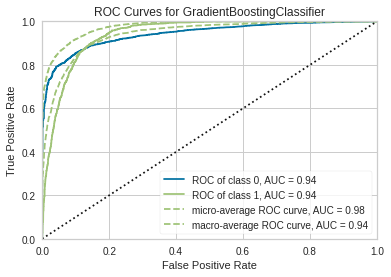

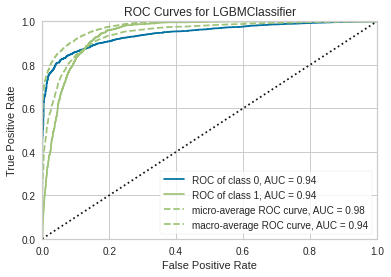

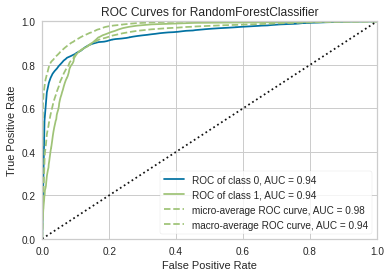

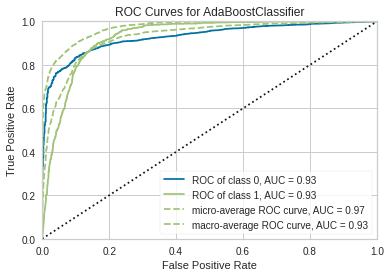

In [ ]:
#ROC curves and AUC for the models
plot_model(gbc, plot = 'auc')
plot_model(lightgbm, plot = 'auc')
plot_model(rf, plot = 'auc')
plot_model(ada, plot = 'auc')



In [ ]:
#Evaluate models and compare
evaluate_model(gbc)
evaluate_model(lightgbm)
evaluate_model(rf)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

**Choosing the best model to work with**

we will choose the model to work with based on auc
therefore the best model here is light gradient boosting classifier

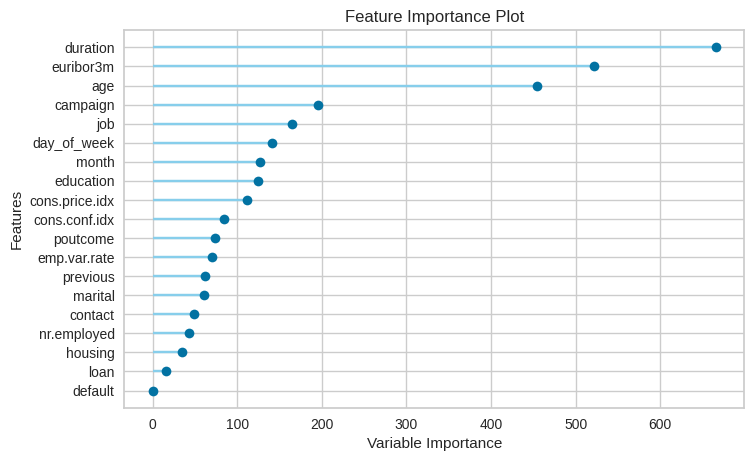

In [ ]:
#plotting feature importance of the model
plot_model(lightgbm, plot='feature_all')

Most important variable in predicting whether the client subscribes to a term deposit or not is the call duration, followed by Euribor rate (one of social and economic context variables), client's age and number of contacts during this campaign.

In [ ]:
#save model
save_model(lightgbm,'best model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=/tmp/joblib),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None, transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None, include=['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'previous', 'poutco...
                  LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                 colsample_bytree=1.0, importance_type='split',
                                 learning_rate=0.1, max_depth=-1,
                                 min_child_samples=20, min_child_weight=0.001,
                                 min_split_gain=0.0, n_estimators=100, n_jobs=-1,
                                 num_leaves=31, objective=None, random_state=860,
                                 reg_alpha=0.0, reg_lambda=0.0, silent='warn',
                    